In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For visualization

In [2]:
df = pd.read_csv("c:/Users/hp/OneDrive/Documents/GlobalLandTemperaturesByCountry.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.info()  # Get dataset information
df.isnull().sum()  # find missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [4]:
df = df.dropna(subset=['AverageTemperature'])

In [5]:
df['dt'] = pd.to_datetime(df['dt'])  # Convert 'dt' column to DateTime format
df['Year'] = df['dt'].dt.year  # Extract year from date

In [6]:
avg_temp_by_year = df.groupby('Year')['AverageTemperature'].mean()

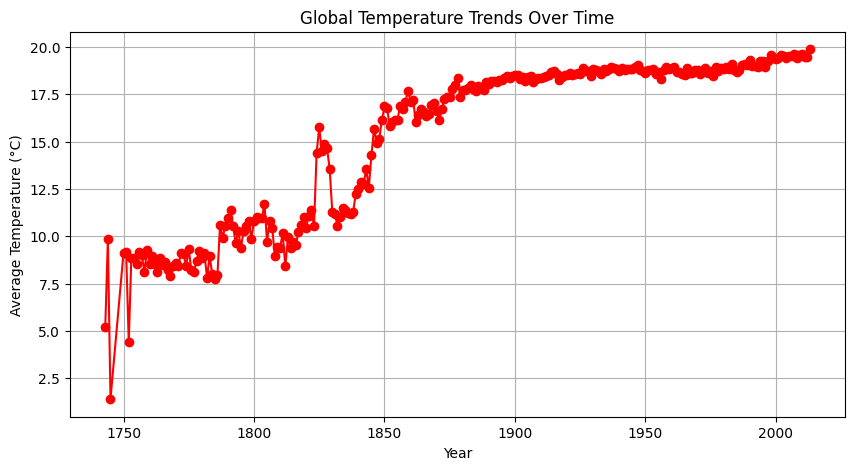

In [7]:
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(avg_temp_by_year.index, avg_temp_by_year.values, color='red', marker='o', linestyle='-')

plt.xlabel('Year')  # X-axis label
plt.ylabel('Average Temperature (°C)')  # Y-axis label
plt.title('Global Temperature Trends Over Time')  # Title
plt.grid(True)  # Add grid 

plt.show()  # Display the plot

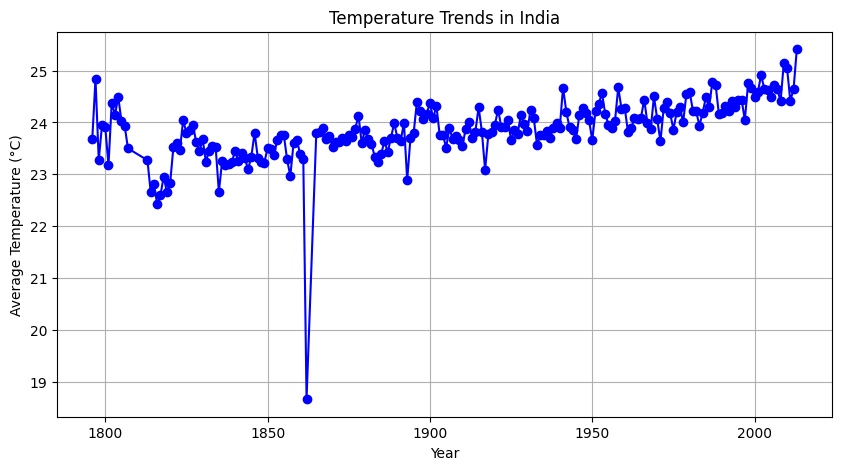

In [8]:
country = "India"
df_country = df[df['Country'] == country]  # Filter data for the chosen country
avg_temp_country = df_country.groupby('Year')['AverageTemperature'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_temp_country.index, avg_temp_country.values, color='blue', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title(f'Temperature Trends in {country}')
plt.grid(True)

plt.show()


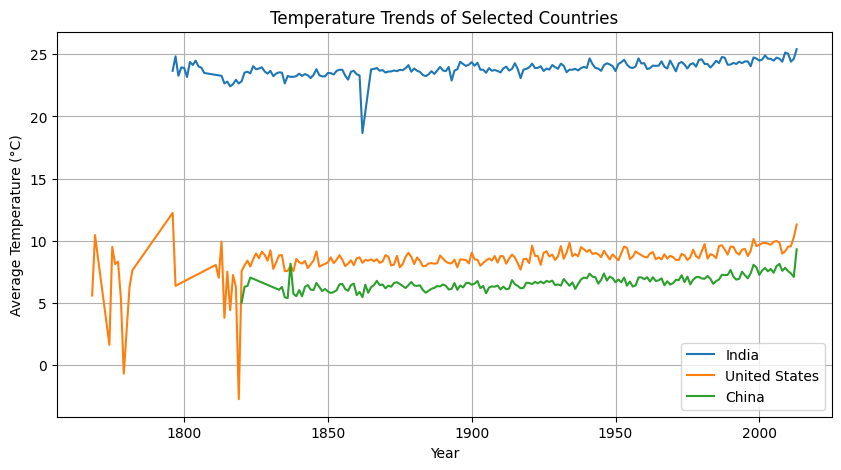

In [9]:
countries = ["India", "United States", "China"]
plt.figure(figsize=(10, 5))

for country in countries:
    df_country = df[df['Country'] == country]
    avg_temp_country = df_country.groupby('Year')['AverageTemperature'].mean()
    plt.plot(avg_temp_country.index, avg_temp_country.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Trends of Selected Countries')
plt.legend()  # Show country labels in the plot
plt.grid(True)

plt.show()


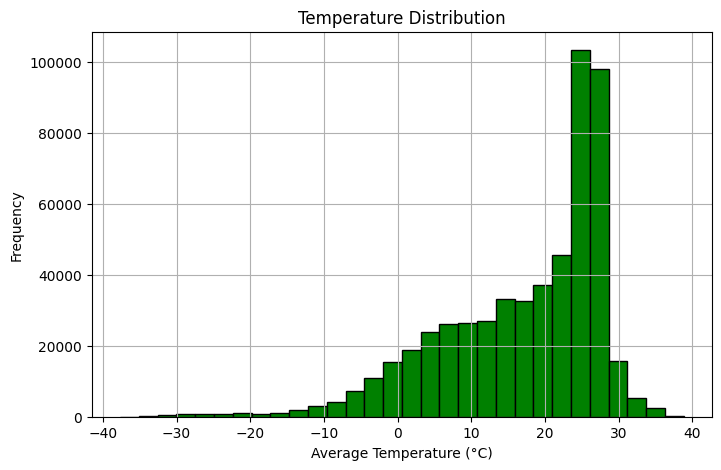

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['AverageTemperature'].dropna(), bins=30, color='green', edgecolor='black')

plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.grid(True)

plt.show()
